In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv('/content/titanic_log.csv')
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0


In [ ]:
# Describe the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000


In [ ]:
#counting data missing in the columns (most are blanks)

df_blanks = df.apply(lambda x: x.isnull().sum(), axis='columns')
df_blanks

0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Length: 891, dtype: int64

In [ ]:
# checking for nas
df_nas = df.isna()
df_nas

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False


In [ ]:
# dropping the data with blank values results to 712 records out of 890 
df = df.dropna()
df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,3,male,22.0,1,0,7.2500,S,0
1,2,1,female,38.0,1,0,71.2833,C,1
2,3,3,female,26.0,0,0,7.9250,S,1
3,4,1,female,35.0,1,0,53.1000,S,1
4,5,3,male,35.0,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
885,886,3,female,39.0,0,5,29.1250,Q,0
886,887,2,male,27.0,0,0,13.0000,S,0
887,888,1,female,19.0,0,0,30.0000,S,1
889,890,1,male,26.0,0,0,30.0000,C,1


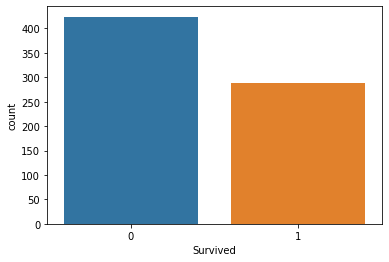

In [ ]:
# Create a sns counplot of the Survived column

ax = sns.countplot(x="Survived", data=df)

In [ ]:
#Describe the age column

df['Age'].describe()

count    712.000000
mean      29.642093
std       14.492933
min        0.420000
25%       20.000000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

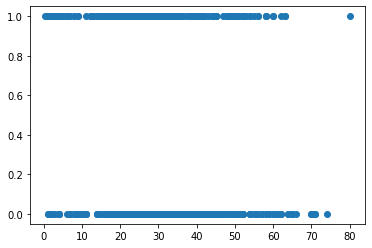

In [ ]:
#scatter plot on age & survival

import matplotlib.pyplot as plt

x = df['Age']
y = df['Survived']

plt.scatter(x , y )
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

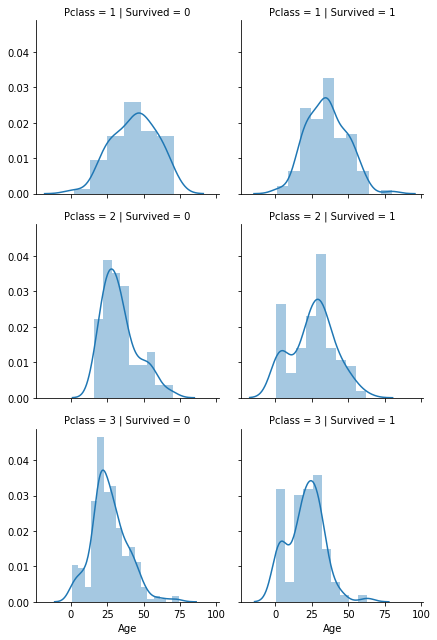

In [ ]:
#Create a FacetGridwith plot having col='Survived', row='Pclass'. Plot Age on the same grid
#& add a legend.

g = sns.FacetGrid(df, col='Survived', row='Pclass')
g = g.map(sns.distplot, 'Age')
g.add_legend()

**Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested.**

In [ ]:
#7Select the features as df[['Pclass','Age','SibSp','Parch','Fare']] and the target is Survived

In [ ]:
features = df[['Pclass','Age','SibSp','Parch','Fare']]
target = df.Survived
features.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.365902,0.065187,0.023666,-0.552893
Age,-0.365902,1.000000,-0.307351,-0.187896,0.093143
SibSp,0.065187,-0.307351,1.000000,0.383338,0.139860
Parch,0.023666,-0.187896,0.383338,1.000000,0.206624
Fare,-0.552893,0.093143,0.139860,0.206624,1.000000


In [ ]:
# Feature Selection (to help answer Question # 19)
features = df[['Pclass','SexNum', 'Age','SibSp']]
target = df.Survived
features.corr()

,Pclass,SexNum,Age,SibSp
Pclass,1.000000,-0.150826,-0.365902,0.065187
SexNum,-0.150826,1.000000,-0.099037,0.106296
Age,-0.365902,-0.099037,1.000000,-0.307351
SibSp,0.065187,0.106296,-0.307351,1.000000


In [ ]:
features = df[['Pclass','Age','SibSp','Parch','SexNum']]
target = df.Survived
features.corr()

,Pclass,Age,SibSp,Parch,SexNum
Pclass,1.000000,-0.365902,0.065187,0.023666,-0.150826
Age,-0.365902,1.000000,-0.307351,-0.187896,-0.099037
SibSp,0.065187,-0.307351,1.000000,0.383338,0.106296
Parch,0.023666,-0.187896,0.383338,1.000000,0.249543
SexNum,-0.150826,-0.099037,0.106296,0.249543,1.000000


In [ ]:
#import statsmodels.api as sm
#from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#8 Use train_test_split to create the x & y training and testing sets

x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.25,random_state=1)
print(x_train)
print(y_train)
print(x_test)



     Pclass   Age  SibSp  Parch  SexNum
453       1  49.0      1      0       1
812       2  35.0      0      0       1
449       1  52.0      0      0       1
146       3  27.0      0      0       1
880       2  25.0      0      1       2
..      ...   ...    ...    ...     ...
182       3   9.0      4      2       1
809       1  33.0      1      0       2
94        3  59.0      0      0       1
292       2  36.0      0      0       1
51        3  21.0      0      0       1

[534 rows x 5 columns]
453    1
812    0
449    1
146    1
880    1
      ..
182    0
809    1
94     0
292    0
51     0
Name: Survived, Length: 534, dtype: int64
     Pclass   Age  SibSp  Parch  SexNum
689       1  15.0      0      1       2
279       3  35.0      1      1       2
508       3  28.0      0      0       1
9         2  14.0      1      0       2
496       1  54.0      1      0       2
..      ...   ...    ...    ...     ...
40        3  40.0      1      0       2
323       2  22.0      1      1    

In [ ]:
#Using statsmodel to generate & fit a logistic regression model with the formula:
#formula = 'Survived ~ C(Pclass) + SexNum + Age + SipSp'


formula = 'Survived ~ C(Pclass) + C(Sex) + Age + SipSp'
print(formula)

Survived ~ C(Pclass) + C(Sex) + Age + SipSp


**Adj. R-squared: **bold text** This is the modified version of R-squared which is adjusted for the number of variables in the regression. It increases only when an additional variable adds to the explanatory power to the regression.

 **Prob(F-Statistic):** This tells the overall significance of the regression.

** AIC/BIC: **It stands for Akaike’s Information Criteria and is used for model selection.

** Prob(Omnibus):** One of the assumptions of OLS is that the errors are normally distributed.

** Durbin-watson:** Another assumption of OLS is of homoscedasticity. This implies that the variance of errors is constant. A value between 1 to 2 is preferred.

 **Prob(Jarque-Bera):** It i in line with the Omnibus test. It is also performed for the distribution analysis of the regression errors.

**OLS stands for: Ordinary Least Squares (OLS)**
**R-squared:** It signifies the “percentage variation in dependent that is explained by independent variables”. 

In [ ]:
#10: Display summary of the model

logitfit = sm.Logit(y_train, x_train, formula = str(formula)).fit()
logitfit.summary()

Optimization terminated successfully.
         Current function value: 0.450159
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  534
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            4
Date:                Mon, 14 Dec 2020   Pseudo R-squ.:                  0.3299
Time:                        02:23:59   Log-Likelihood:                -240.38
converged:                       True   LL-Null:                       -358.73
Covariance Type:            nonrobust   LLR p-value:                 4.791e-50
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -1.1899      0.116    -10.267      0.000      -1.417      -0.963
Age           -0.0429      0.006     -6.646      0.000      -0.055      -0.030
SibSp         -0.3688      0.144     -2.562      0.010      -0.651      -0.087
Parch         -0.0991      0.130     -0.760      0.447      -0.354       0.156
SexNum         2.6805      0.238     11.246      0.000       2.213       3.148
==============================================================================
"""

In [ ]:
  #11,12&13. Calculate the y predicted values with your logistic model
  # finds out the error in the prediction

y_pred = np.round(logitfit.predict(x_test))
residuals = y_test - y_pred
print('Mean of residuals =', np.mean(residuals))

Mean of residuals = -0.011235955056179775


In [ ]:
#14. Create and display a confusion matrix using Pandas crosstab.



In [ ]:
'''12. Round y_pred and save the values in y_pred.
13. Calculate the model residuals.
14. Create and display a confusion matrix using Pandas crosstab.
15. Plot the confusion matrix with a heatmap
16. Print the value for TN, TP, FN and FP
17. Calculate and print the accuracy score
18. Plot the ROC curve
19. Using your model, plot the distribution of the probability of survival with respect to the age of
the passengers'''

In [ ]:
# 14. Create and display a confusion matrix using Pandas crosstab.

#A confusion matrix is a technique for summarizing the performance of a 
#classification algorithm. Classification accuracy alone can be 
#misleading if you have an unequal number of observations in each class 
#or if you have more than two classes in your dataset

confusion = pd.crosstab(y_test,y_pred)
print ("Confusion Matrix : \n", confusion)

Confusion Matrix : 
 col_0     0.0  1.0
Survived          
0          82   20
1          18   58


In [ ]:
TP = 82, FP = 20
FN = 18   TN = 58

In [ ]:
99+58

157

In [ ]:
#recall
99/157

0.6305732484076433

In [ ]:
#precision
99/102

0.9705882352941176

In [ ]:
#accuracy computation
117/178

0.6573033707865169

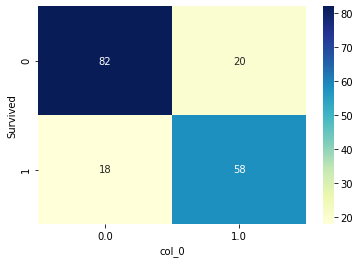

In [ ]:
#15 Plot the confusion matrix with a heatmap
##16: Print the value for TN, TP, FN, and FP

sns.heatmap(confusion, annot=True, cmap="YlGnBu")
plt.show()

In [ ]:
TN = confusion[0][0]   
TP = confusion[1][1]

FN = confusion[1][0]
FP = confusion[0][1]

print('\n\nTrue Negative =', TN)
print('True Positive =', TP)
print('False Negative =', FN)
print('False Positive =', FP)



True Negative = 82
True Positive = 58
False Negative = 20
False Positive = 18


In [ ]:
#17 Calculate and print the accuracy score
print('\n\nAccuracy =', round((TP + TN)/ (TP +TN + FN + FP),2))



Accuracy = 0.79


An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters: True Positive Rate. False Positive Rate


It is mainly used for numerical and predictive analysis by the help of the Python language. What is the ROC curve? A receiver operating characteristic curve, commonly known as the ROC curve.

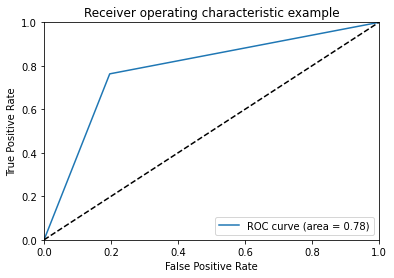

In [ ]:
#Plot the ROC curve ROC(Receiver Operating Characteristic)



plt.clf()
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Notes:

If cdf, sf, cumhazard, or entropy are computed, they are computed based on the definition of the kernel rather than the FFT approximation, even if the density is fit with FFT = True.

KDEUnivariate is much faster than KDEMultivariate, due to its FFT-based implementation. It should be preferred for univariate, continuous data. KDEMultivariate also supports mixed data.

Text(0.5, 1.0, 'Distribution of our Predictions')

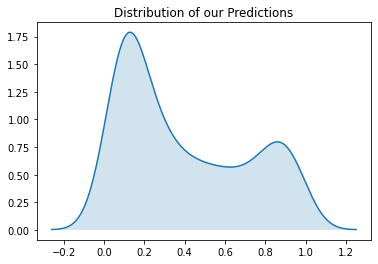

In [ ]:
#19 Using your model, plot the distribution of the probability of survival with respect to the age of
#the passengers

kde_res = sm.nonparametric.KDEUnivariate(logitfit.predict())
kde_res.fit()
plt.plot(kde_res.support,kde_res.density)
plt.fill_between(kde_res.support,kde_res.density, alpha=0.2)
plt.title("Distribution of our Predictions")


In [ ]:
# Feature Recode: Male = 1, Female = 2 for regression
dict = {'male' : '1', 'female' : '2'} 
print(dict)

{'male': '1', 'female': '2'}


In [ ]:
df['SexNum']= df['Sex'].map(dict) 
df['SexNum'] =  df['SexNum'].astype('int')  # change object to in

In [ ]:
df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,SexNum
0,1,3,male,22.0,1,0,7.2500,S,0,1
1,2,1,female,38.0,1,0,71.2833,C,1,2
2,3,3,female,26.0,0,0,7.9250,S,1,2
3,4,1,female,35.0,1,0,53.1000,S,1,2
4,5,3,male,35.0,0,0,8.0500,S,0,1


Text(0.5, 1.0, 'The Change of Survival Probability by Gender being Male')

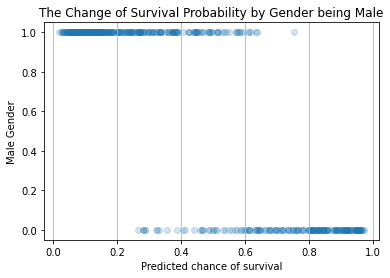

In [ ]:
#  Let's see the prediction distribution based on the male gender: Male = 1, Female = 2 for regression
male = x_train.SexNum==1
plt.scatter(logitfit.predict(),male , alpha=0.2)
plt.grid(b=True, which='major', axis='x')
plt.xlabel("Predicted chance of survival")
plt.ylabel("Male Gender")
plt.title("The Change of Survival Probability by Gender being Male")

Text(0, 0.5, 'age')

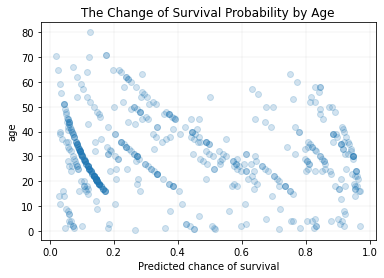

In [ ]:
plt.scatter(logitfit.predict(),x_train.Age , alpha=0.2)
plt.grid(True, linewidth=0.15)
plt.title("The Change of Survival Probability by Age")
plt.xlabel("Predicted chance of survival")
plt.ylabel("age")